In [1]:
from scipy.io import loadmat, savemat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [ ]:
mat = loadmat("channel_data60Ghz_mob.mat")
harray, hvirtual = [mat[key] for key in ["Harray", "Hvirtual"]]
num_channels = harray.shape[0]

In [6]:
raw_data = loadmat("Harray60GhzULA8x8s006.mat")

In [7]:
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Mar 29 12:10:37 2019',
 '__version__': '1.0',
 '__globals__': [],
 'Ht': array([[[[[-1.22290730e-12-6.01136849e-12j,
             7.23791686e-13-3.21946636e-12j,
            -8.03676830e-12+3.42504150e-12j, ...,
             9.41385771e-12-5.48601919e-12j,
             3.73608392e-12-1.68698649e-11j,
            -6.06193871e-12-3.64882733e-12j],
           [ 1.48729282e-13+6.49205169e-12j,
            -1.09163416e-12+4.28646008e-12j,
             8.80125226e-12-1.83052618e-12j, ...,
            -9.79536244e-12+3.52025115e-12j,
            -5.88325959e-12+1.61298874e-11j,
             4.84416630e-12+4.54111358e-12j],
           [ 1.03529099e-12-6.69245952e-12j,
             1.78571752e-12-5.25797071e-12j,
            -9.30806040e-12+5.49316892e-14j, ...,
             9.74722907e-12-1.51123515e-12j,
             7.90755742e-12-1.50232153e-11j,
            -3.52345822e-12-5.21868573e-12j],
           ...,
           

In [3]:
df_harray = pd.DataFrame(harray.reshape((num_channels,-1)))
df_hvirtual = pd.DataFrame(hvirtual.reshape((num_channels,-1)))

In [4]:
df_harray.iloc[:,0:5].describe()

,0,1,2,3,4
count,(11945+0j),(11945+0j),(11945+0j),(11945+0j),(11945+0j)
mean,(-1.821651757686325e-12-1.3249983132154902e-12j),(-5.041924708283179e-12+4.041092865043275e-12j),(-5.376511354942281e-13+9.19434510858364e-12j),(2.2187061298578647e-13-2.8010271741182544e-12j),(-1.9563032234540397e-12+7.189506139338547e-12j)
std,(7.238215910260271e-10+0j),(7.225084745510762e-10+0j),(7.209043256003094e-10+0j),(7.180461435311503e-10+0j),(7.218882133949024e-10+0j)
min,(-1.340409294670053e-08+4.253727592384848e-09j),(-1.2448393427177962e-08+9.447868265510806e-09j),(-1.5251519158709925e-08+7.122169964901559e-09j),(-1.298872565058673e-08-1.6219139364892499e-09j),(-1.0685117679543055e-08-7.886093555953266e-09j)
25%,(-1.1595491060389929e-11+1.6720916318213597e-11j),(-1.103713301309206e-11+7.527293892362064e-12j),(-1.0630679496415052e-11-2.1988893345037397e-11j),(-1.0943796216467128e-11+4.389244176450369e-12j),(-1.0610828188317711e-11+1.1233148959621797e-11j)
50%,(-4.307753765785301e-14+1.2557262087792287e-13j),(3.853343882989418e-15+8.963625848512624e-12j),(2.8793977022590483e-14+1.9512293324597425e-14j),(-7.852346145627087e-17+1.999726839129498e-15j),(3.302685138177261e-14+5.137266046589817e-12j)
75%,(1.0480115039679383e-11-1.0414036820394212e-11j),(1.1204682147381018e-11+1.4417200766558835e-10j),(1.1205657061974517e-11+1.3053865280387988e-11j),(1.1072151875901604e-11-8.427177358716342e-12j),(1.1087537138410042e-11-3.964876343909296e-11j)
max,(1.694475137981044e-08-5.199131125621648e-10j),(9.72206048999169e-09-4.4700918522266875e-09j),(1.5379090001488294e-08+2.4790813846209403e-09j),(1.0034037600803458e-08+1.3616625160750573e-08j),(1.1278057598929081e-08-1.2676790284160688e-08j)


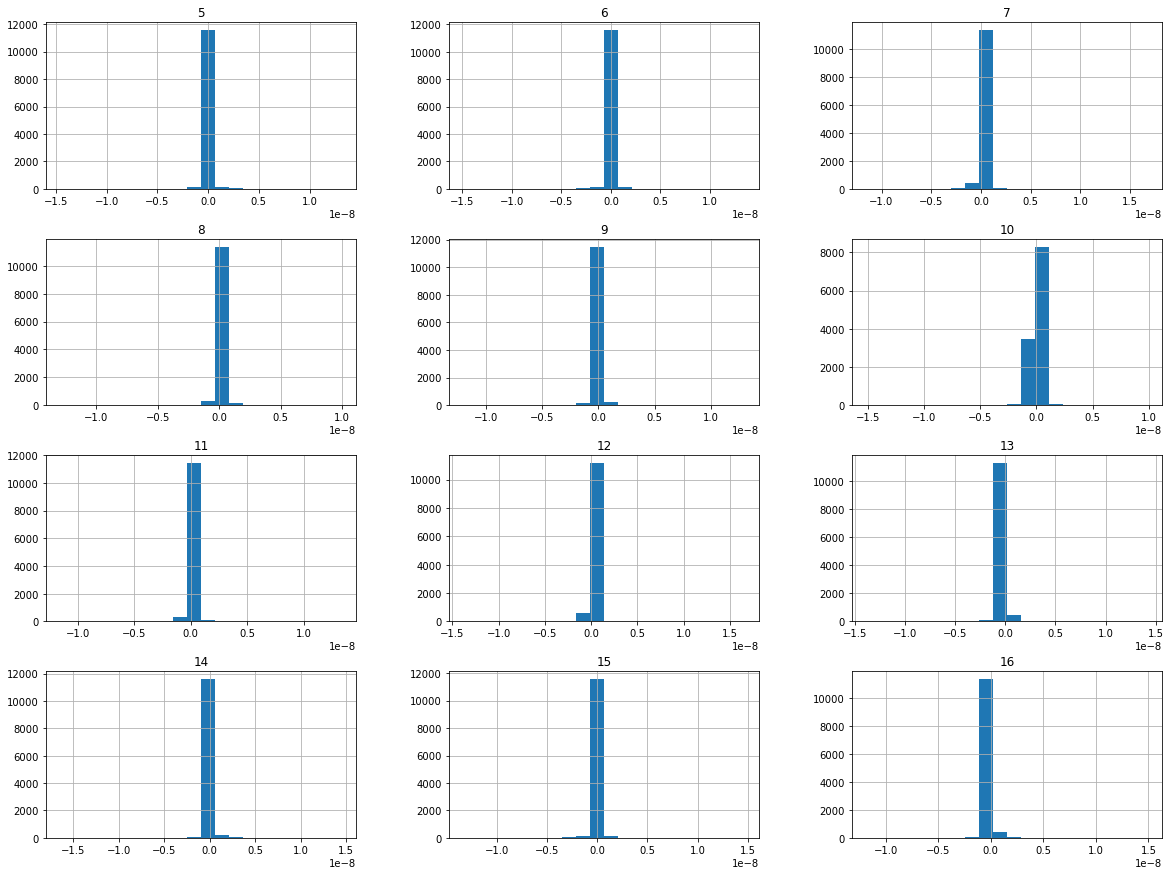

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
df_harray.iloc[:,5:17].hist(bins=20, figsize=(20,15))
plt.show()

In [2]:
from mimo_channels_data_generator2 import RandomChannelMimoDataGenerator

Using TensorFlow backend.


In [4]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

Nt = 8  # num of Rx antennas, will be larger than Nt for uplink massive MIMO
Nr = 8  # num of Tx antennas
min_randomized_snr_db = -1
max_randomized_snr_db = 1
numSamplesPerExample = 256  # number of channel uses, input and output pairs
numExamplesWithFixedChannel = 1
numSamplesPerFixedChannel = (
    numExamplesWithFixedChannel * numSamplesPerExample
)  # coherence time
# obs: it may make sense to have the batch size equals the coherence time
batch_size = 5  # numExamplesWithFixedChannel
num_test_examples = 200  # for evaluating in the end, after training
# get small number to avoid slowing down the simulation, test in the end
num_validation_examples = 200
num_training_examples = 400
method = "manual"
file = "channel_data60Ghz.mat"

In [5]:
training_generator = RandomChannelMimoDataGenerator(
    batch_size=batch_size,
    Nr=Nr,
    Nt=Nt,
    # num_clusters=num_clusters,
    numSamplesPerFixedChannel=numSamplesPerFixedChannel,
    # numSamplesPerExample=numSamplesPerExample, SNRdB=SNRdB,
    numSamplesPerExample=numSamplesPerExample,
    # method='random')
    method=method,
    file = file
)
training_generator.randomize_SNR = True
training_generator.min_randomized_snr_db = min_randomized_snr_db
training_generator.max_randomized_snr_db = max_randomized_snr_db

In [6]:
input_train, output_train = training_generator.get_examples(num_training_examples)

In [7]:
print(np.mean(input_train), np.min(input_train), np.max(input_train))
#print(np.median(input_train[0,:,:]), np.min(input_train[0,:,:]), np.max(input_train[0,:,:]))
#mean_y = pd.DataFrame(output_train.mean(axis=1))

0.001027099609375 -1.0 1.0


In [8]:
input_train.shape

(2000, 256, 16)

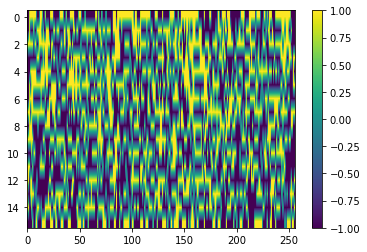

In [11]:
plt.imshow(input_train[2,:,:].T, interpolation = 'bilinear', aspect = 'auto')
plt.colorbar()

In [14]:
dfinput = pd.DataFrame(input_train[0,:,:], columns = ['Nt' + str(i) for i in range(1,17)])
#dfinput.plot(kind = 'scatter', x = 'Nt1', y = 'Nt2', alpha = 0.1)
corr = dfinput.corr()
print(corr['Nt1'].sort_values(ascending = False))

Nt1     1.000000
Nt2     0.421188
Nt8     0.381298
Nt3     0.380463
Nt5     0.363931
Nt4     0.340242
Nt7     0.196355
Nt6     0.175016
Nt10    0.119151
Nt12    0.062927
Nt11    0.051112
Nt9     0.045550
Nt15    0.044646
Nt14    0.026150
Nt16   -0.020294
Nt13   -0.076543
Name: Nt1, dtype: float64


In [15]:
dfinput.head()

,Nt1,Nt2,Nt3,Nt4,Nt5,Nt6,Nt7,Nt8,Nt9,Nt10,Nt11,Nt12,Nt13,Nt14,Nt15,Nt16
0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
dfinput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 16 columns):
Nt1     256 non-null float64
Nt2     256 non-null float64
Nt3     256 non-null float64
Nt4     256 non-null float64
Nt5     256 non-null float64
Nt6     256 non-null float64
Nt7     256 non-null float64
Nt8     256 non-null float64
Nt9     256 non-null float64
Nt10    256 non-null float64
Nt11    256 non-null float64
Nt12    256 non-null float64
Nt13    256 non-null float64
Nt14    256 non-null float64
Nt15    256 non-null float64
Nt16    256 non-null float64
dtypes: float64(16)
memory usage: 32.1 KB


In [17]:
dfinput.describe()

,Nt1,Nt2,Nt3,Nt4,Nt5,Nt6,Nt7,Nt8,Nt9,Nt10,Nt11,Nt12,Nt13,Nt14,Nt15,Nt16
count,256.000000,256.00000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.0000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,-0.109375,-0.03125,-0.156250,-0.164062,-0.054688,-0.054688,-0.078125,-0.140625,0.1250,0.203125,0.171875,0.265625,0.171875,0.093750,0.250000,0.250000
std,0.995948,1.00147,0.989652,0.988382,1.000459,1.000459,0.998896,0.992002,0.9941,0.981071,0.987048,0.965965,0.987048,0.997546,0.970143,0.970143
min,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-0.007250800703054967 -7.982047715205228 7.89877839507324


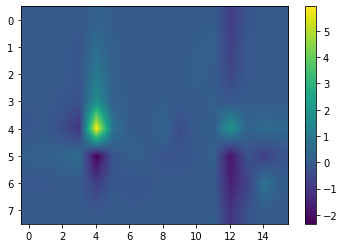

In [26]:
plt.imshow(output_train[2,:,:].T, interpolation = 'bilinear', aspect = 'auto')
plt.colorbar()
print(np.mean(output_train), np.min(output_train), np.max(output_train))
dfoutput = pd.DataFrame(output_train[0,:,:], columns = ['Nr' + str(i) for i in range(1,9)])
#dfoutput.plot.scatter(x='a',y='b')

In [28]:
corr = dfoutput.corr()
print(corr['Nr1'].sort_values(ascending = False))

Nr1    1.000000
Nr8    0.928921
Nr2    0.915150
Nr7    0.744462
Nr3    0.671120
Nr6    0.496609
Nr4    0.363318
Nr5   -0.291415
Name: Nr1, dtype: float64


In [29]:
dfoutput.head()

,Nr1,Nr2,Nr3,Nr4,Nr5,Nr6,Nr7,Nr8
0,-0.449125,-0.477076,-0.530930,-0.966478,1.503519,-0.391572,-0.409856,-0.429217
1,-0.057123,-0.096090,-0.207958,-0.346384,0.798293,0.037600,-0.000955,-0.029141
2,-0.023176,-0.021364,-0.065340,-0.133554,0.144566,0.003132,-0.008156,-0.015291
3,-0.012637,-0.027262,-0.018453,-0.062865,-0.403822,0.021431,0.001989,-0.006741
4,-0.016256,-0.013713,0.004717,0.030351,0.353870,-0.053174,-0.031608,-0.022935


In [30]:
dfoutput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
Nr1    16 non-null float64
Nr2    16 non-null float64
Nr3    16 non-null float64
Nr4    16 non-null float64
Nr5    16 non-null float64
Nr6    16 non-null float64
Nr7    16 non-null float64
Nr8    16 non-null float64
dtypes: float64(8)
memory usage: 1.1 KB


In [31]:
dfoutput.describe()

,Nr1,Nr2,Nr3,Nr4,Nr5,Nr6,Nr7,Nr8
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,-0.040525,-0.062270,-0.101858,-0.314104,0.652726,0.009663,-0.010613,-0.025957
std,0.113092,0.134834,0.217094,0.860055,1.676935,0.172804,0.128994,0.112582
min,-0.449125,-0.477076,-0.729707,-3.386911,-0.440727,-0.391572,-0.409856,-0.429217
25%,-0.025482,-0.029483,-0.050615,-0.126552,0.081944,-0.031183,-0.018128,-0.019265
50%,-0.016089,-0.022046,-0.024393,-0.086789,0.227765,0.001052,-0.007372,-0.011975
75%,0.000506,-0.002915,-0.007032,-0.015338,0.399201,0.023732,0.006207,0.002334
max,0.055711,0.032342,0.063097,0.234810,6.701442,0.525563,0.269626,0.089192


In [29]:
savemat(f"C:\\Users\\wesin\\Documents\\Wesin\\Doutorado\\channel-estimation\\datasets\\1-bit\\quant\\mimo8x8_256samples_60Hz.mat", {'inputs': input_train, 'outputs': output_train})

W0826 10:09:36.886125  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:36.968515  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.051464  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.135027  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.201410  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.285338  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.368750  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.435486  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.516997  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.602143  9776 legend.py:1282] No handles with labels found to put in legend.
W0826 10:09:37.669250  9776 legend.py:1282] No handles with labels found to put in legend.

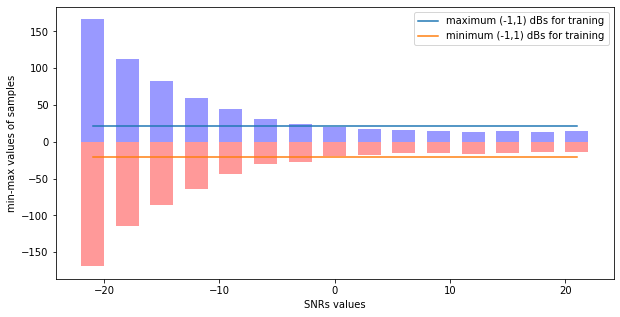

In [72]:
snrs = np.arange(-21,22,3)
bar_width = 2
error_config = {'ecolor': '0.3'}
opacity = 0.4
fig = plt.figure(figsize = (10,5))
ax = plt.subplot(1,1,1)

values = []
for i,snr in enumerate(snrs):
    mat = loadmat(f"C:\\Users\\wesin\\Documents\\Wesin\\Doutorado\\channel-estimation\\datasets\\raw\\testing\\mimo8x8_{snr}snr_256samples_60GHz")
    input_train, output_train = [mat[key] for key in ["inputs", "outputs"]]
    mean, minimum, maximum = (np.mean(input_train), np.min(input_train), np.max(input_train))
    values.append(input_train.mean(axis=(1,2)))
    ax.set_ylabel("min-max values of samples")
    ax.set_xlabel("SNRs values")
    ax.legend()
    plt.bar(snr, maximum, bar_width, alpha=opacity, color='b', error_kw=error_config)
    plt.bar(snr, minimum, bar_width, alpha=opacity, color='r', error_kw=error_config)
    '''
    ax = plt.subplot(1,2,2)
    ax.set_xticks(snrs)
    ax.set_ylabel("mean values of samples")
    ax.legend()
    plt.bar(snr, mean, bar_width, alpha=opacity, color='y', error_kw=error_config)
    '''


mat = loadmat(f"C:\\Users\\wesin\\Documents\\Wesin\\Doutorado\\channel-estimation\\datasets\\raw\\mimo8x8_256samples_60GHz")
input_train, output_train = [mat[key] for key in ["inputs", "outputs"]]
mean, minimum, maximum = (np.mean(input_train), np.min(input_train), np.max(input_train))
ax.plot(snrs, [maximum for _ in range(len(snrs))], label="maximum (-1,1) dBs for traning")
ax.plot(snrs, [minimum for _ in range(len(snrs))], label="minimum (-1,1) dBs for training")
ax.legend()

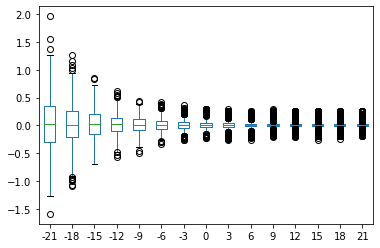

In [71]:
df = pd.DataFrame(np.transpose(values), columns=np.arange(-21,22,3))
df.plot.box()

In [43]:
SNRs = np.arange(-21,22,3)
for SNRdb in SNRs:
        
        training_generator.randomize_SNR = False
        training_generator.SNRdB = SNRdb
        training_generator.min_randomized_snr_db = min_randomized_snr_db
        training_generator.max_randomized_snr_db = max_randomized_snr_db

        inputs, outputs = training_generator.get_examples(num_test_examples)

        savemat(f"C:\\Users\\wesin\\Documents\\Wesin\\Doutorado\\channel-estimation\\datasets\\1-bit\\testing\\quant\\mimo8x8_{SNRdb}snr_256samples_60GHz.mat", {'inputs': inputs, 'outputs': outputs})

In [66]:
def ak_quantizer(x, b, x_min, x_max, force_zero_level=0):
    # obs: in original function, x_min, x_max have default values
    M = 2 ** b #number of quantization levels
    
    # Choose the min value such that the result coincides with Lloyd's
    # optimum quantizer when the input is uniformly distributed. Instead of
    # delta=abs((xmax-xmin)/(M-1)); as quantization step use:

    delta = np.abs((x_max - x_min) / M)
    quantizer_levels = x_min + (delta / 2) + np.arange(0,M)*delta

    if force_zero_level == 1:
        zero_represented = list(quantizer_levels).count(0) #is 0 there?
        if zero_represented == 0: # zero is not represented yet
            abs_levels = np.abs(quantizer_levels)
            min_abs = np.min(abs_levels)
            # take in account that two levels, say -5 and 5 can be minimum
            # make sure it is the largest, such that there are more negative
            # quantizer levels than positive

            min_level_indices = [i for i, n in enumerate(abs_levels) if n == min_abs]
            closest_ind = min_level_indices[-1]
            closest_to_zero_value = quantizer_levels[closest_ind]
            quantizer_levels = quantizer_levels - closest_to_zero_value
        
    
    x_minq = np.min(quantizer_levels)
    x_maxq = np.max(quantizer_levels)
    x_i = (x - x_minq) / delta # quantizer levels
    x_i = np.round(x_i)
    for k,x in enumerate(x_i):
        if x < 0:
            x_i[k] = 0
    
    for k,x in enumerate(x_i):
        if x > 2 ** b - 1:
            x_i[k] = 2 ** b - 1
    
    x_q = x_i * delta + x_minq

    partitions_thresholds = 0.5 * (quantizer_levels[0:-2]) + quantizer_levels[1:-1]

    return x_q, x_i, quantizer_levels, partitions_thresholds


In [39]:
mat = loadmat(f"C:\\Users\\wesin\\Documents\\Wesin\\Doutorado\\channel-estimation\\datasets\\1-bit\\testing\quant\\mimo8x8_12snr_60Hz")
input_train, output_train = [mat[key] for key in ["inputs", "outputs"]]

(2500, 256, 16)


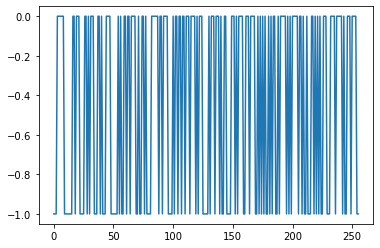

In [40]:
plt.plot(input_train[0,:,2])
print(input_train.shape)

In [12]:
print(input_train.shape)
print(output_train.shape)

x = np.random.randn(5,256,8)
y = np.random.randn(5,256,8)
z = np.array([input_train[:,:,0:8],input_train[:,:,8:16]])
print(z.shape)

(2000, 256, 16)
(2000, 16, 8)
(2, 2000, 256, 8)
